### Comments
***This problem can be solved using stack and queue***


* Initally we add all the elements for processing onto a queue.
* Combining chars that are either aplha or ints togther.
* We also add the brackets as they give us context.


* We then process the queue adding to the answer as we go. We try and simplifiy as we go.
* This can by using the following cases:
* * Simple element just a char add directly to answer.
* * Has a number and brackets. Save the number and expaned the brackets exluding the last. Add to the start of the queue.

```
    st = [3, [a,2,[,c,],] ]  -> st = [a,2,[,c,], a,2,[,c,], a,2,[,c,],]
```

* * If bracket expanision results in a non complex set of elements then we can multiply by the op and directly add to answer

```
    st = 3[a,b,c] , ans ='' -> st = [a,b,c,a,b,c] ans='' -> ans = 'abcabcabc'
```




### Complexity:

* K being the number of nested expansions in s.

***Time***: O(K)

***Space***: O(K)

In [ ]:
from collections import deque


class Solution:
    def decodeString(self, s: str) -> str:
        st = deque()

        i = 0
        while i < len(s):
            c = s[i]
            if c in "[]":
                st.append(c)
            elif st and st[-1].isalnum() and st[-1].isnumeric() == c.isnumeric():
                st[-1] += c
            else:
                st.append(c)
            i += 1

        ans = ""
        while st:
            op = 1
            if st[0].isnumeric():
                op = int(st.popleft())

            if st[0] == "[":
                bk = deque()
                bk.append(st.popleft())
                eles = []
                while bk:
                    ele = st.popleft()
                    if ele in "[]":
                        if bk[-1] == "[" and ele == "]":
                            bk.pop()
                            if bk:
                                eles.append(ele)
                        else:
                            bk.append(ele)
                            eles.append(ele)
                    else:
                        eles.append(ele)
                joined = "".join(eles)
                if joined.isalpha():
                    ans += joined * op
                else:
                    st = deque(eles * op) + st
            else:
                ans += st.popleft() * op

        return ans


s = Solution()


# Example 1:

# Input: s = "3[a]2[bc]"
# Output: "aaabcbc"

print(s.decodeString("3[a]2[bc]"))
# Example 2:

# Input: s = "3[a2[c]]"
# Output: "accaccacc"
print(s.decodeString("3[a2[c]]"))
# Example 3:

# Input: s = "2[abc]3[cd]ef"
# Output: "abcabccdcdcdef"
print(s.decodeString("2[abc]3[cd]ef"))


# "zzzyypqjkjkefjkjkefjkjkefjkjkefyypqjkjkefjkjkefjkjkefjkjkefef"
print(s.decodeString("3[z]2[2[y]pq4[2[jk]e1[f]]]ef"))


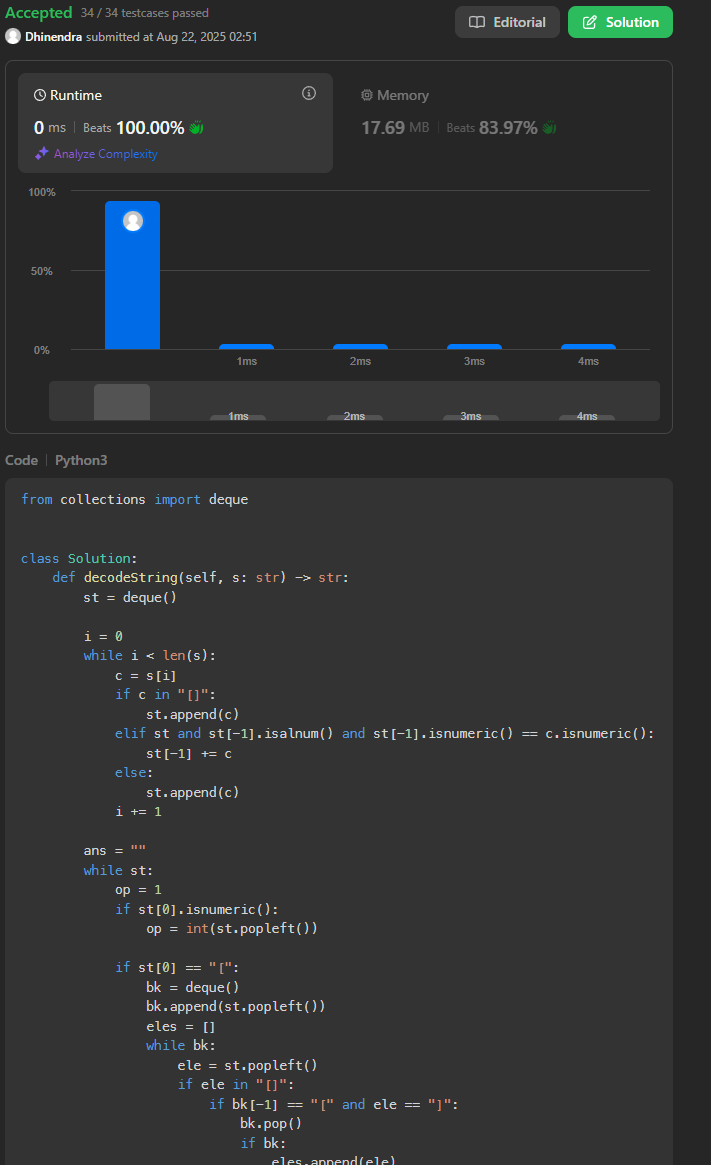

### Community References:
* Far simpler approach


```
class Solution:
    def decodeString(self, s: str) -> str:
        st = deque()
        for c in s:
            if c == "]":

                ct = ""
                while st[-1] != "[":
                    ct += st.pop()

                st.pop()
                op = ""
                while st and st[-1].isnumeric():
                    op = st.pop() + op

                st.extend(ct[::-1] * int(op))
            else:
                st.append(c)
        return "".join(st)
```

* This uses one stack and process based on the brackets.

### Complexity:

* K being the number of nested expansions in s.

***Time***: O(K)

***Space***: O(K)
